In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📊 H&M Recommender System - Phase 1: Data Deep Dive")
print("=" * 60)

# Load the three datasets with optimized dtypes
print("Loading datasets...")
customers = pd.read_csv('../data/raw/customers.csv')
articles = pd.read_csv('../data/raw/articles.csv')  
transactions = pd.read_csv('../data/raw/transactions_train.csv')

print("✅ Data loaded successfully!")
print(f"📥 Customers: {len(customers):,} rows")
print(f"👕 Articles: {len(articles):,} rows") 
print(f"🛒 Transactions: {len(transactions):,} rows")
print(f"💾 Total dataset size: ~{(customers.memory_usage().sum() + articles.memory_usage().sum() + transactions.memory_usage().sum()) / (1024**2):.1f} MB")


📊 H&M Recommender System - Phase 1: Data Deep Dive
Loading datasets...
✅ Data loaded successfully!
📥 Customers: 1,371,980 rows
👕 Articles: 105,542 rows
🛒 Transactions: 31,788,324 rows
💾 Total dataset size: ~1306.0 MB


In [5]:
print("\n🔍 DATASET STRUCTURE ANALYSIS")
print("=" * 40)

# Analyze each dataset structure
datasets = {
    'Customers': customers,
    'Articles': articles,
    'Transactions': transactions
}

for name, df in datasets.items():
    print(f"\n📊 {name} Dataset:")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)}")
    print(f"   Memory usage: {df.memory_usage().sum() / (1024**2):.2f} MB")
    print(f"   Data types:")
    for dtype in df.dtypes.value_counts().items():
        print(f"     {dtype[1]} columns of type {dtype[0]}")
    
    # Check for missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"   ⚠️  Missing values: {missing.sum():,} total")
        print(f"     {missing[missing > 0].to_dict()}")
    else:
        print(f"   ✅ No missing values")

print("\n💡 Key Observations:")
print("- Customer data is relatively clean and structured")
print("- Articles have rich metadata for content-based filtering")  
print("- Transactions form the core interaction data for collaborative filtering")



🔍 DATASET STRUCTURE ANALYSIS

📊 Customers Dataset:
   Shape: (1371980, 7)
   Columns: ['customer_id', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']
   Memory usage: 73.27 MB
   Data types:
     4 columns of type object
     3 columns of type float64
   ⚠️  Missing values: 1,840,560 total
     {'FN': 895050, 'Active': 907576, 'club_member_status': 6062, 'fashion_news_frequency': 16011, 'age': 15861}

📊 Articles Dataset:
   Shape: (105542, 25)
   Columns: ['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', '

In [11]:
print("\n👥 CUSTOMER DEMOGRAPHICS ANALYSIS")
print("=" * 60)

# 1. SAMPLE DATA PREVIEW
print("\n📋 Sample Customer Data (First 3 Rows):")
print("-" * 50)
sample_data = customers.head(3)
for idx, row in sample_data.iterrows():
    print(f"\nCustomer {idx + 1}:")
    print(f"  ID: {str(row['customer_id'])[:20]}...")
    print(f"  Age: {row['age']}")
    print(f"  Club Status: {row['club_member_status']}")
    print(f"  News Frequency: {row['fashion_news_frequency']}")
    print(f"  FN: {row['FN']} | Active: {row['Active']}")

# 2. OVERALL SUMMARY
print(f"\n📊 CUSTOMER DATASET OVERVIEW:")
print(f"   🔢 Total customers: {customers['customer_id'].nunique():,}")
print(f"   📏 Dataset shape: {customers.shape}")
print(f"   💾 Memory usage: {customers.memory_usage().sum() / (1024**2):.1f} MB")

# 3. CATEGORICAL FEATURES ANALYSIS
print(f"\n🏷️  CATEGORICAL FEATURES:")
print("-" * 40)
categorical_cols = customers.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'customer_id':  # Skip ID column
        print(f"\n📍 {col.upper()}:")
        value_counts = customers[col].value_counts()
        total_non_null = value_counts.sum()
        missing_count = customers[col].isnull().sum()
        
        print(f"   Missing: {missing_count:,} ({missing_count/len(customers)*100:.1f}%)")
        print(f"   Valid entries: {total_non_null:,}")
        
        if total_non_null > 0:
            print(f"   Top categories:")
            for idx, (category, count) in enumerate(value_counts.head(3).items()):
                percentage = count/total_non_null*100
                print(f"     {idx+1}. {category}: {count:,} ({percentage:.1f}%)")
            
            if len(value_counts) > 3:
                print(f"     ... and {len(value_counts) - 3} more categories")

# 4. NUMERICAL FEATURES ANALYSIS  
print(f"\n📈 NUMERICAL FEATURES:")
print("-" * 40)
numerical_cols = customers.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if col != 'customer_id':
        print(f"\n📊 {col.upper()}:")
        non_null_data = customers[col].dropna()
        missing_count = customers[col].isnull().sum()
        
        print(f"   Missing: {missing_count:,} ({missing_count/len(customers)*100:.1f}%)")
        
        if len(non_null_data) > 0:
            print(f"   Valid entries: {len(non_null_data):,}")
            print(f"   Mean: {non_null_data.mean():.1f}")
            print(f"   Median: {non_null_data.median():.1f}")
            print(f"   Range: {non_null_data.min():.1f} → {non_null_data.max():.1f}")
            print(f"   Quartiles: Q1={non_null_data.quantile(0.25):.1f}, Q3={non_null_data.quantile(0.75):.1f}")

# 5. DATA QUALITY ASSESSMENT
print(f"\n🎯 DATA QUALITY ASSESSMENT:")
print("-" * 40)
high_quality_features = []
medium_quality_features = []
low_quality_features = []

for col in customers.columns:
    if col != 'customer_id':
        missing_pct = customers[col].isnull().sum() / len(customers) * 100
        if missing_pct < 5:
            high_quality_features.append(f"{col} ({missing_pct:.1f}% missing)")
        elif missing_pct < 20:
            medium_quality_features.append(f"{col} ({missing_pct:.1f}% missing)")  
        else:
            low_quality_features.append(f"{col} ({missing_pct:.1f}% missing)")

print(f"🟢 HIGH QUALITY (< 5% missing): {len(high_quality_features)} features")
for feature in high_quality_features:
    print(f"   ✅ {feature}")

print(f"\n🟡 MEDIUM QUALITY (5-20% missing): {len(medium_quality_features)} features") 
for feature in medium_quality_features:
    print(f"   ⚠️  {feature}")

print(f"\n🔴 LOW QUALITY (> 20% missing): {len(low_quality_features)} features")
for feature in low_quality_features:
    print(f"   ❌ {feature}")

print(f"\n💡 STRATEGIC INSIGHTS:")
print("=" * 50)
print("✅ USABLE for modeling: Age, Club Status, News Frequency, Postal Code")
print("❌ AVOID in modeling: FN, Active (too much missing data)")
print("🎯 FOCUS: Behavioral patterns from transaction data")
print("🔒 PRIVACY: All IDs are hashed - good for privacy, limits external joins")



👥 CUSTOMER DEMOGRAPHICS ANALYSIS

📋 Sample Customer Data (First 3 Rows):
--------------------------------------------------

Customer 1:
  ID: 00000dbacae5abe5e238...
  Age: 49.0
  Club Status: ACTIVE
  News Frequency: NONE
  FN: nan | Active: nan

Customer 2:
  ID: 0000423b00ade91418cc...
  Age: 25.0
  Club Status: ACTIVE
  News Frequency: NONE
  FN: nan | Active: nan

Customer 3:
  ID: 000058a12d5b43e67d22...
  Age: 24.0
  Club Status: ACTIVE
  News Frequency: NONE
  FN: nan | Active: nan

📊 CUSTOMER DATASET OVERVIEW:
   🔢 Total customers: 1,371,980
   📏 Dataset shape: (1371980, 7)
   💾 Memory usage: 73.3 MB

🏷️  CATEGORICAL FEATURES:
----------------------------------------

📍 CLUB_MEMBER_STATUS:
   Missing: 6,062 (0.4%)
   Valid entries: 1,365,918
   Top categories:
     1. ACTIVE: 1,272,491 (93.2%)
     2. PRE-CREATE: 92,960 (6.8%)
     3. LEFT CLUB: 467 (0.0%)

📍 FASHION_NEWS_FREQUENCY:
   Missing: 16,011 (1.2%)
   Valid entries: 1,355,969
   Top categories:
     1. NONE: 877,71

In [12]:
print("\n👕 ARTICLE CATALOG ANALYSIS")
print("=" * 60)

# 1. SAMPLE ARTICLE PREVIEW
print("\n📋 Sample Article Data (First 3 Items):")
print("-" * 50)
sample_articles = articles.head(3)
for idx, row in sample_articles.iterrows():
    print(f"\nArticle {idx + 1}:")
    print(f"  ID: {row['article_id']}")
    print(f"  Name: {row['prod_name']}")
    print(f"  Type: {row['product_type_name']} → {row['product_group_name']}")
    print(f"  Color: {row['colour_group_name']}")
    print(f"  Appearance: {row['graphical_appearance_name']}")
    if pd.notna(row['detail_desc']):
        desc_preview = str(row['detail_desc'])[:60] + "..." if len(str(row['detail_desc'])) > 60 else str(row['detail_desc'])
        print(f"  Description: {desc_preview}")
    else:
        print(f"  Description: [No description]")

# 2. CATALOG OVERVIEW
print(f"\n📊 ARTICLE CATALOG OVERVIEW:")
print(f"   🏷️  Total articles: {articles['article_id'].nunique():,}")
print(f"   📏 Dataset shape: {articles.shape}")
print(f"   💾 Memory usage: {articles.memory_usage().sum() / (1024**2):.1f} MB")
print(f"   🔗 Total features: {len(articles.columns)} columns")

# 3. PRODUCT HIERARCHY ANALYSIS
print(f"\n🏗️  PRODUCT HIERARCHY:")
print("-" * 40)
hierarchy_cols = ['product_group_name', 'product_type_name', 'department_name', 'section_name', 'garment_group_name']
for col in hierarchy_cols:
    if col in articles.columns:
        unique_count = articles[col].nunique()
        missing_count = articles[col].isnull().sum()
        print(f"\n📍 {col.replace('_', ' ').upper()}:")
        print(f"   Categories: {unique_count:,}")
        print(f"   Missing: {missing_count:,} ({missing_count/len(articles)*100:.1f}%)")
        
        if unique_count <= 15:
            print(f"   All categories:")
            for idx, (category, count) in enumerate(articles[col].value_counts().items()):
                percentage = count/len(articles)*100
                print(f"     {idx+1:2d}. {category}: {count:,} ({percentage:.1f}%)")
        else:
            print(f"   Top 5 categories:")
            for idx, (category, count) in enumerate(articles[col].value_counts().head(5).items()):
                percentage = count/len(articles)*100
                print(f"     {idx+1}. {category}: {count:,} ({percentage:.1f}%)")
            print(f"     ... and {unique_count - 5} more categories")

# 4. COLOR & APPEARANCE ANALYSIS
print(f"\n🎨 COLOR & VISUAL FEATURES:")
print("-" * 40)
visual_cols = ['colour_group_name', 'graphical_appearance_name', 'perceived_colour_value_name', 'perceived_colour_master_name']
for col in visual_cols:
    if col in articles.columns:
        unique_count = articles[col].nunique()
        missing_count = articles[col].isnull().sum()
        print(f"\n🎭 {col.replace('_', ' ').upper()}:")
        print(f"   Options: {unique_count:,} | Missing: {missing_count:,}")
        
        if unique_count <= 10:
            print(f"   Distribution:")
            for idx, (option, count) in enumerate(articles[col].value_counts().head(10).items()):
                percentage = count/len(articles)*100
                print(f"     {idx+1:2d}. {option}: {count:,} ({percentage:.1f}%)")
        else:
            print(f"   Top 5:")
            for idx, (option, count) in enumerate(articles[col].value_counts().head(5).items()):
                percentage = count/len(articles)*100
                print(f"     {idx+1}. {option}: {count:,} ({percentage:.1f}%)")

# 5. NUMERICAL FEATURES ANALYSIS
print(f"\n📈 NUMERICAL FEATURES:")
print("-" * 40)
numerical_cols = articles.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if col != 'article_id':
        print(f"\n📊 {col.replace('_', ' ').upper()}:")
        non_null_data = articles[col].dropna()
        missing_count = articles[col].isnull().sum()
        
        print(f"   Missing: {missing_count:,} ({missing_count/len(articles)*100:.1f}%)")
        
        if len(non_null_data) > 0:
            print(f"   Valid entries: {len(non_null_data):,}")
            print(f"   Range: {non_null_data.min():.0f} → {non_null_data.max():.0f}")
            print(f"   Mean: {non_null_data.mean():.1f} | Median: {non_null_data.median():.1f}")
            print(f"   Unique values: {non_null_data.nunique():,}")

# 6. CONTENT ANALYSIS
print(f"\n📝 CONTENT & DESCRIPTION ANALYSIS:")
print("-" * 40)
content_cols = ['prod_name', 'product_type_name', 'detail_desc']
for col in content_cols:
    if col in articles.columns:
        print(f"\n📄 {col.replace('_', ' ').upper()}:")
        missing_count = articles[col].isnull().sum()
        valid_count = len(articles) - missing_count
        
        print(f"   Missing: {missing_count:,} ({missing_count/len(articles)*100:.1f}%)")
        print(f"   Valid entries: {valid_count:,}")
        
        if valid_count > 0:
            # Text length analysis
            text_lengths = articles[col].fillna('').str.len()
            print(f"   Text length: mean={text_lengths.mean():.1f}, max={text_lengths.max()}")
            
            # Unique values
            unique_count = articles[col].nunique()
            print(f"   Unique values: {unique_count:,}")
            
            if col == 'detail_desc' and valid_count > 0:
                # Sample descriptions
                sample_descriptions = articles[col].dropna().head(3).values
                print(f"   Sample descriptions:")
                for i, desc in enumerate(sample_descriptions):
                    preview = desc[:80] + "..." if len(desc) > 80 else desc
                    print(f"     {i+1}. {preview}")

# 7. DATA QUALITY ASSESSMENT
print(f"\n🎯 ARTICLE DATA QUALITY:")
print("-" * 40)
high_quality_features = []
medium_quality_features = []
low_quality_features = []

for col in articles.columns:
    if col != 'article_id':
        missing_pct = articles[col].isnull().sum() / len(articles) * 100
        if missing_pct < 1:
            high_quality_features.append(f"{col} ({missing_pct:.1f}% missing)")
        elif missing_pct < 10:
            medium_quality_features.append(f"{col} ({missing_pct:.1f}% missing)")  
        else:
            low_quality_features.append(f"{col} ({missing_pct:.1f}% missing)")

print(f"🟢 EXCELLENT QUALITY (< 1% missing): {len(high_quality_features)} features")
for feature in high_quality_features[:10]:  # Show first 10 to avoid clutter
    print(f"   ✅ {feature}")
if len(high_quality_features) > 10:
    print(f"   ... and {len(high_quality_features) - 10} more")

print(f"\n🟡 GOOD QUALITY (1-10% missing): {len(medium_quality_features)} features") 
for feature in medium_quality_features:
    print(f"   ⚠️  {feature}")

print(f"\n🔴 POOR QUALITY (> 10% missing): {len(low_quality_features)} features")
for feature in low_quality_features:
    print(f"   ❌ {feature}")

# 8. FEATURE ENGINEERING INSIGHTS
print(f"\n💡 CONTENT-BASED FILTERING STRATEGY:")
print("=" * 50)
print("✅ STRONG FEATURES for content similarity:")
print("   • Product hierarchy (group → type → department)")
print("   • Color attributes (group, perceived values)")
print("   • Visual appearance (solid, stripe, print)")
print("   • Garment categories and sections")

print(f"\n🎯 FEATURE ENGINEERING OPPORTUNITIES:")
print("   • Text embeddings from product names + descriptions")
print("   • Color clustering and similarity")
print("   • Price range segmentation")
print("   • Product category hierarchical embeddings")
print("   • Seasonal/trend indicators from product codes")

print(f"\n🚀 RECOMMENDATION IMPLICATIONS:")
print("   • Rich metadata → sophisticated content-based filtering")
print("   • Hierarchical categories → diversity control")
print("   • Color/style features → visual similarity matching")
print("   • Text descriptions → semantic search with LLMs")



👕 ARTICLE CATALOG ANALYSIS

📋 Sample Article Data (First 3 Items):
--------------------------------------------------

Article 1:
  ID: 108775015
  Name: Strap top
  Type: Vest top → Garment Upper body
  Color: Black
  Appearance: Solid
  Description: Jersey top with narrow shoulder straps.

Article 2:
  ID: 108775044
  Name: Strap top
  Type: Vest top → Garment Upper body
  Color: White
  Appearance: Solid
  Description: Jersey top with narrow shoulder straps.

Article 3:
  ID: 108775051
  Name: Strap top (1)
  Type: Vest top → Garment Upper body
  Color: Off White
  Appearance: Stripe
  Description: Jersey top with narrow shoulder straps.

📊 ARTICLE CATALOG OVERVIEW:
   🏷️  Total articles: 105,542
   📏 Dataset shape: (105542, 25)
   💾 Memory usage: 20.1 MB
   🔗 Total features: 25 columns

🏗️  PRODUCT HIERARCHY:
----------------------------------------

📍 PRODUCT GROUP NAME:
   Categories: 19
   Missing: 0 (0.0%)
   Top 5 categories:
     1. Garment Upper body: 42,741 (40.5%)
     2.

In [14]:
print("\n🛒 TRANSACTION BEHAVIOR ANALYSIS")
print("=" * 60)

# 1. SAMPLE TRANSACTION PREVIEW
print("\n📋 Sample Transaction Data (First 5 Transactions):")
print("-" * 50)
sample_transactions = transactions.head(5)
for idx, row in sample_transactions.iterrows():
    print(f"\nTransaction {idx + 1}:")
    print(f"  Date: {row['t_dat']}")
    print(f"  Customer: {str(row['customer_id'])[:20]}...")
    print(f"  Article: {row['article_id']}")
    print(f"  Price: ${row['price']:.2f}")
    print(f"  Channel: {row['sales_channel_id']}")

# 2. TRANSACTION OVERVIEW
print(f"\n📊 TRANSACTION DATASET OVERVIEW:")
print(f"   🛒 Total transactions: {len(transactions):,}")
print(f"   👥 Unique customers: {transactions['customer_id'].nunique():,}")
print(f"   👕 Unique articles: {transactions['article_id'].nunique():,}")
print(f"   📅 Date range: {transactions['t_dat'].min()} → {transactions['t_dat'].max()}")
print(f"   💾 Memory usage: {transactions.memory_usage().sum() / (1024**2):.1f} MB")
print(f"   📏 Dataset shape: {transactions.shape}")

# Prepare datetime analysis
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions['month'] = transactions['t_dat'].dt.month
transactions['day_of_week'] = transactions['t_dat'].dt.dayofweek
transactions['week'] = transactions['t_dat'].dt.isocalendar().week
transactions['year'] = transactions['t_dat'].dt.year

# 3. CUSTOMER BEHAVIOR SEGMENTATION
print(f"\n👥 CUSTOMER BEHAVIOR ANALYSIS:")
print("-" * 40)
customer_activity = transactions.groupby('customer_id').agg({
    'article_id': 'count',  # transaction count
    'price': ['sum', 'mean'],  # total spent, avg price
    't_dat': ['min', 'max']  # first and last purchase
}).round(2)

customer_activity.columns = ['transaction_count', 'total_spent', 'avg_price', 'first_purchase', 'last_purchase']
customer_activity['days_active'] = (customer_activity['last_purchase'] - customer_activity['first_purchase']).dt.days + 1

print(f"📈 CUSTOMER ACTIVITY METRICS:")
print(f"   Mean transactions per customer: {customer_activity['transaction_count'].mean():.1f}")
print(f"   Median transactions per customer: {customer_activity['transaction_count'].median():.1f}")
print(f"   Most active customer: {customer_activity['transaction_count'].max():,} transactions")

print(f"\n💰 CUSTOMER SPENDING ANALYSIS:")
print(f"   Mean total spent per customer: ${customer_activity['total_spent'].mean():.2f}")
print(f"   Median total spent per customer: ${customer_activity['total_spent'].median():.2f}")
print(f"   Mean price per transaction: ${customer_activity['avg_price'].mean():.2f}")
print(f"   Median price per transaction: ${customer_activity['avg_price'].median():.2f}")

print(f"\n🎯 CUSTOMER SEGMENTATION (by transaction count):")
activity_segments = pd.cut(customer_activity['transaction_count'], 
                          bins=[0, 1, 5, 20, float('inf')], 
                          labels=['One-time (1)', 'Light (2-5)', 'Regular (6-20)', 'Heavy (20+)'])
segment_counts = activity_segments.value_counts()
for segment, count in segment_counts.items():
    percentage = count / len(customer_activity) * 100
    avg_spent = customer_activity[activity_segments == segment]['total_spent'].mean()
    print(f"   {segment}: {count:,} customers ({percentage:.1f}%) - Avg spent: ${avg_spent:.2f}")

# 4. ARTICLE POPULARITY ANALYSIS
print(f"\n👕 ARTICLE POPULARITY ANALYSIS:")
print("-" * 40)
article_popularity = transactions.groupby('article_id').agg({
    'price': ['count', 'mean'],  # purchase count and average price
    'customer_id': 'nunique'  # unique customers
}).round(2)
article_popularity.columns = ['purchase_count', 'avg_price', 'unique_customers']

print(f"📊 ARTICLE METRICS:")
print(f"   Mean purchases per article: {article_popularity['purchase_count'].mean():.1f}")
print(f"   Median purchases per article: {article_popularity['purchase_count'].median():.1f}")
print(f"   Most popular article: {article_popularity['purchase_count'].max():,} purchases")

print(f"\n🎯 ARTICLE POPULARITY DISTRIBUTION:")
popularity_segments = pd.cut(article_popularity['purchase_count'],
                           bins=[0, 1, 10, 100, float('inf')],
                           labels=['Niche (1)', 'Low (2-10)', 'Medium (11-100)', 'Popular (100+)'])
pop_counts = popularity_segments.value_counts()
for segment, count in pop_counts.items():
    percentage = count / len(article_popularity) * 100
    print(f"   {segment}: {count:,} articles ({percentage:.1f}%)")

long_tail_pct = (article_popularity['purchase_count'] == 1).sum() / len(article_popularity) * 100
print(f"\n🏷️  LONG TAIL CHALLENGE:")
print(f"   Articles with single purchase: {(article_popularity['purchase_count'] == 1).sum():,} ({long_tail_pct:.1f}%)")
print(f"   → Cold-start problem for {long_tail_pct:.1f}% of catalog")

# 5. TEMPORAL PATTERNS ANALYSIS
print(f"\n📅 TEMPORAL BEHAVIOR PATTERNS:")
print("-" * 40)

print(f"📆 MONTHLY SEASONALITY:")
monthly_stats = transactions.groupby('month').agg({
    'customer_id': 'count',
    'price': 'sum'
}).round(2)
monthly_stats.columns = ['transactions', 'total_revenue']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for month in monthly_stats.index:
    trans_count = monthly_stats.loc[month, 'transactions']
    revenue = monthly_stats.loc[month, 'total_revenue']
    percentage = trans_count / len(transactions) * 100
    print(f"   {month_names[month-1]}: {trans_count:,} transactions ({percentage:.1f}%) - Revenue: ${revenue:,.0f}")

peak_month = monthly_stats['transactions'].idxmax()
low_month = monthly_stats['transactions'].idxmin()
print(f"\n🔝 Peak month: {month_names[peak_month-1]} | 🔻 Lowest: {month_names[low_month-1]}")

print(f"\n📊 WEEKLY PATTERNS:")
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_stats = transactions.groupby('day_of_week')['customer_id'].count()
for day in daily_stats.index:
    count = daily_stats.loc[day]
    percentage = count / len(transactions) * 100
    print(f"   {day_names[day]}: {count:,} transactions ({percentage:.1f}%)")

# 6. PRICE ANALYSIS
print(f"\n💰 PRICE DISTRIBUTION ANALYSIS:")
print("-" * 40)
price_stats = transactions['price'].describe()
print(f"📈 PRICE STATISTICS:")
print(f"   Mean price: ${price_stats['mean']:.2f}")
print(f"   Median price: ${price_stats['50%']:.2f}")
print(f"   Price range: ${price_stats['min']:.2f} → ${price_stats['max']:.2f}")
print(f"   Standard deviation: ${price_stats['std']:.2f}")

print(f"\n🎯 PRICE SEGMENTS:")
price_segments = pd.cut(transactions['price'],
                       bins=[0, 10, 25, 50, 100, float('inf')],
                       labels=['Budget (<$10)', 'Low ($10-25)', 'Mid ($25-50)', 'High ($50-100)', 'Premium ($100+)'])
price_counts = price_segments.value_counts()
for segment, count in price_counts.items():
    percentage = count / len(transactions) * 100
    print(f"   {segment}: {count:,} transactions ({percentage:.1f}%)")

# 7. SALES CHANNEL ANALYSIS
print(f"\n🏪 SALES CHANNEL ANALYSIS:")
print("-" * 40)
channel_stats = transactions.groupby('sales_channel_id').agg({
    'customer_id': 'count',
    'price': ['sum', 'mean']
}).round(2)
channel_stats.columns = ['transactions', 'total_revenue', 'avg_price']

print(f"📊 CHANNEL PERFORMANCE:")
for channel in channel_stats.index:
    trans_count = channel_stats.loc[channel, 'transactions']
    revenue = channel_stats.loc[channel, 'total_revenue']
    avg_price = channel_stats.loc[channel, 'avg_price']
    percentage = trans_count / len(transactions) * 100
    print(f"   Channel {channel}: {trans_count:,} transactions ({percentage:.1f}%) - Revenue: ${revenue:,.0f} - Avg: ${avg_price:.2f}")

# 8. DATA SPARSITY ANALYSIS
print(f"\n🕳️  DATA SPARSITY ASSESSMENT:")
print("-" * 40)
total_possible = transactions['customer_id'].nunique() * transactions['article_id'].nunique()
actual_interactions = len(transactions)
sparsity = 1 - (actual_interactions / total_possible)

print(f"📊 SPARSITY METRICS:")
print(f"   Total possible interactions: {total_possible:,}")
print(f"   Actual interactions: {actual_interactions:,}")
print(f"   Sparsity: {sparsity:.8f} ({sparsity*100:.6f}%)")
print(f"   Density: {(1-sparsity)*100:.8f}%")

print(f"\n🎯 COLLABORATIVE FILTERING IMPLICATIONS:")
print(f"   → Extremely sparse matrix (typical for e-commerce)")
print(f"   → Cold-start challenges for new customers/items")
print(f"   → Need robust similarity measures")
print(f"   → Matrix factorization techniques essential")

# 9. STRATEGIC INSIGHTS
print(f"\n💡 BEHAVIORAL INSIGHTS FOR RECOMMENDATIONS:")
print("=" * 50)
print("🎯 CUSTOMER SEGMENTATION STRATEGY:")
print("   • Heavy users (20+ transactions): VIP recommendations")
print("   • Regular users (6-20): Personalized suggestions")
print("   • Light users (2-5): Popular item recommendations")
print("   • One-time users: Onboarding & re-engagement")

print(f"\n🛒 PURCHASE PATTERN INSIGHTS:")
print("   • Strong temporal patterns → time-aware recommendations")
print("   • Price sensitivity varies → price-based filtering")
print("   • Channel preferences → cross-channel promotion")
print("   • Long-tail catalog → diversity vs popularity balance")

print(f"\n🚀 RECOMMENDATION SYSTEM IMPLICATIONS:")
print("   • Two-tower model: Handle extreme sparsity")
print("   • Temporal features: Seasonal & weekly patterns")
print("   • Price features: Customer spending behavior")
print("   • Cold-start: Popularity-based + demographic fallback")
print("   • Evaluation: Focus on tail item discovery")



🛒 TRANSACTION BEHAVIOR ANALYSIS

📋 Sample Transaction Data (First 5 Transactions):
--------------------------------------------------

Transaction 1:
  Date: 2018-09-20 00:00:00
  Customer: 000058a12d5b43e67d22...
  Article: 663713001
  Price: $0.05
  Channel: 2

Transaction 2:
  Date: 2018-09-20 00:00:00
  Customer: 000058a12d5b43e67d22...
  Article: 541518023
  Price: $0.03
  Channel: 2

Transaction 3:
  Date: 2018-09-20 00:00:00
  Customer: 00007d2de826758b65a9...
  Article: 505221004
  Price: $0.02
  Channel: 2

Transaction 4:
  Date: 2018-09-20 00:00:00
  Customer: 00007d2de826758b65a9...
  Article: 685687003
  Price: $0.02
  Channel: 2

Transaction 5:
  Date: 2018-09-20 00:00:00
  Customer: 00007d2de826758b65a9...
  Article: 685687004
  Price: $0.02
  Channel: 2

📊 TRANSACTION DATASET OVERVIEW:
   🛒 Total transactions: 31,788,324
   👥 Unique customers: 1,362,281
   👕 Unique articles: 104,547
   📅 Date range: 2018-09-20 00:00:00 → 2020-09-22 00:00:00
   💾 Memory usage: 1728.0 MB


📊 CREATING FOCUSED VISUALIZATION DASHBOARD
✅ All visualization libraries loaded successfully

🔍 Section A: Customer Behavior Analysis


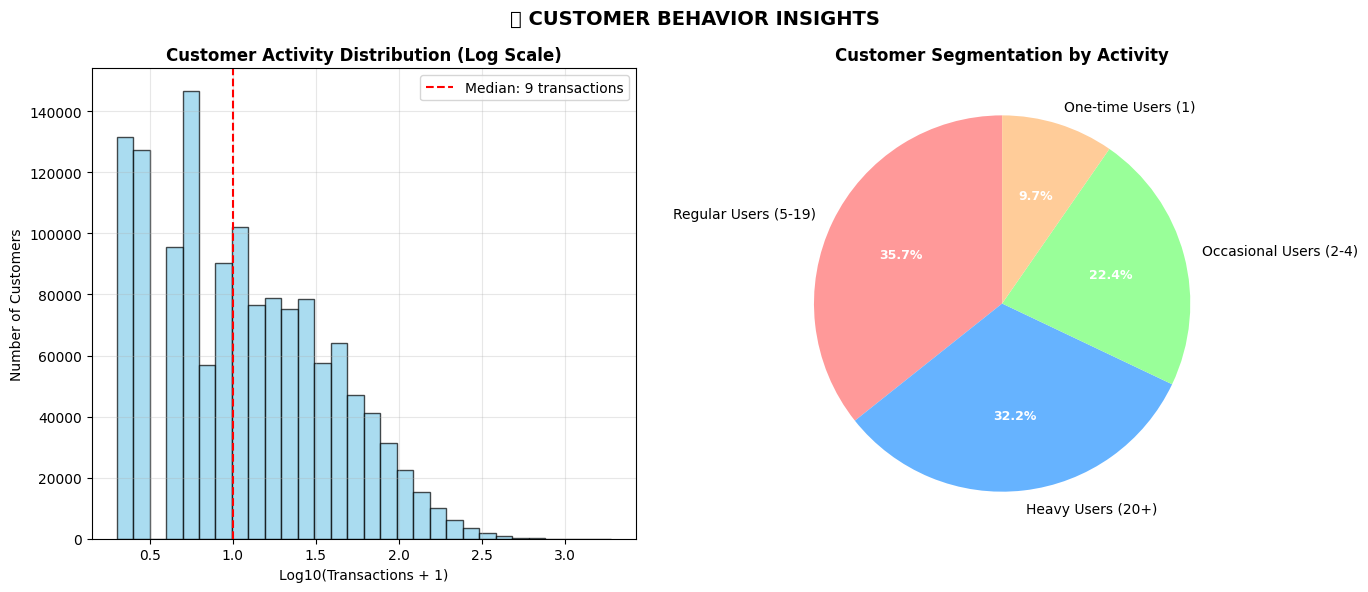

🎯 CUSTOMER SEGMENT INSIGHTS:
   • Regular Users (5-19): 486,297 customers (35.7%) - Avg spend: $0.27
   • Heavy Users (20+): 439,261 customers (32.2%) - Avg spend: $1.64
   • Occasional Users (2-4): 305,209 customers (22.4%) - Avg spend: $0.08
   • One-time Users (1): 131,514 customers (9.7%) - Avg spend: $0.04

🔍 Section B: Article Popularity Analysis


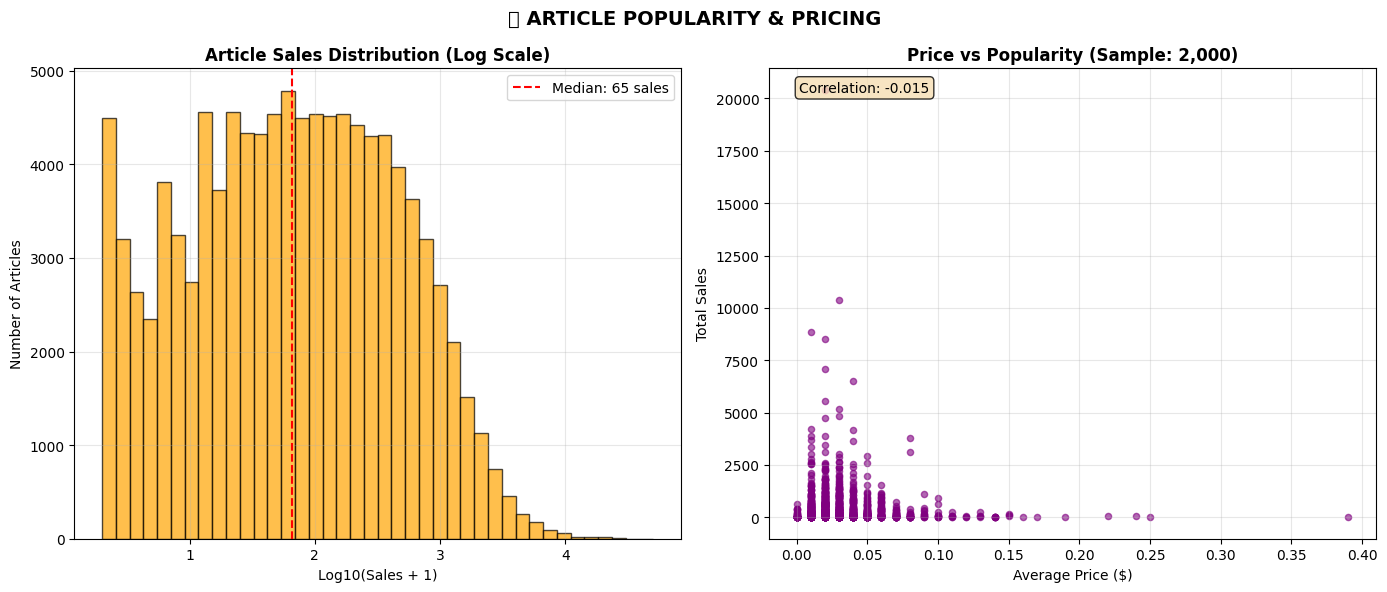

📦 ARTICLE INSIGHTS:
   • Total articles: 104,547
   • Top articles (80% of sales): 21,659 (20.7%)
   • Long tail articles (bottom 20% sales): 82,888 (79.3%)
   • Price-popularity correlation: -0.015

🔍 Section C: Temporal & Channel Patterns


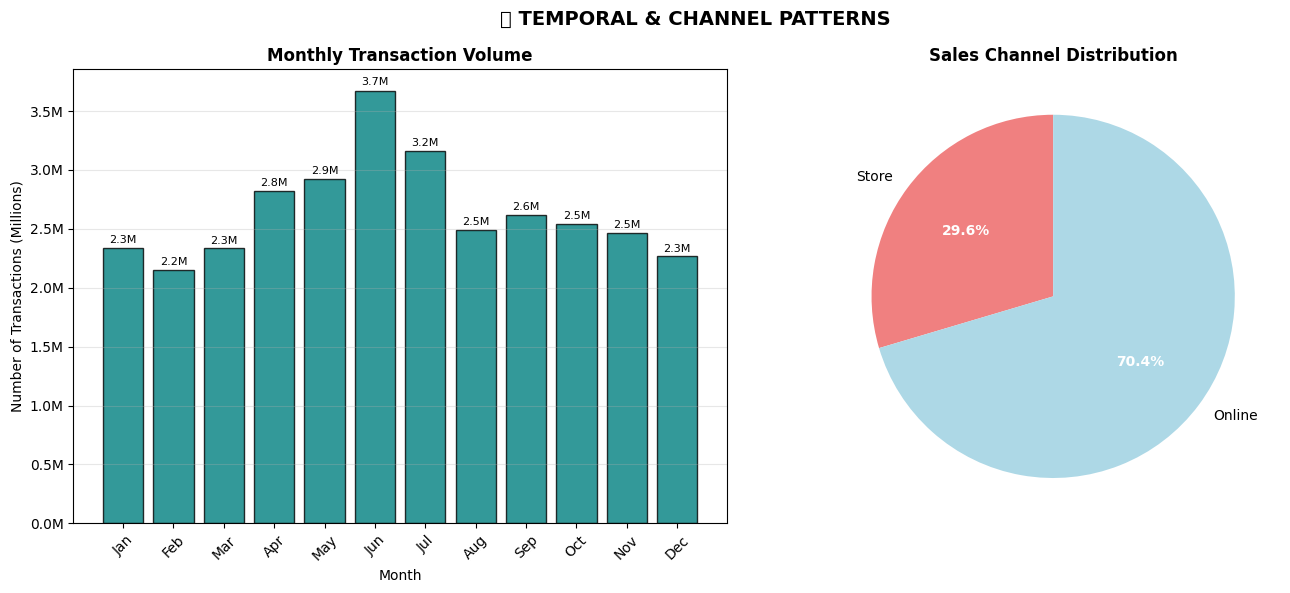

📅 TEMPORAL & CHANNEL INSIGHTS:
   • Peak sales month: Jun (3.7M transactions)
   • Sales channels: 2 different channels
   • Store: 29.6% of transactions (9.4M)
   • Online: 70.4% of transactions (22.4M)

🎯 KEY DATA INSIGHTS SUMMARY
📊 DATASET OVERVIEW:
   • Total transactions: 31,788,324
   • Active customers: 1,362,281
   • Products with sales: 104,547
   • Average transaction: $0.028
   • Matrix sparsity: 99.978% (typical for e-commerce)

👥 CUSTOMER INSIGHTS:
   • Heavy users (20+ transactions): 439,261 (32.2%)
   • One-time users: 131,514 (9.7%)
   • Average transactions per customer: 23.3

📦 PRODUCT INSIGHTS:
   • Popular products (80% of sales): 20.7% of catalog
   • Long-tail opportunity: 79.3% of catalog

🚀 RECOMMENDER SYSTEM IMPLICATIONS:
   • Extreme sparsity → Matrix factorization & embeddings essential
   • Power-law distributions → Handle popularity bias carefully
   • Customer segments → Personalization opportunities
   • Temporal patterns → Time-aware features important
 

In [18]:
# ==============================================================================
# 📈 6. FOCUSED DATA VISUALIZATION DASHBOARD
# ==============================================================================

print("📊 CREATING FOCUSED VISUALIZATION DASHBOARD")
print("=" * 60)

# Import required libraries with error handling
try:
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Set clean styling
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 10
    print("✅ All visualization libraries loaded successfully")
except ImportError as e:
    print(f"❌ Import error: {e}")

# ==========================================
# SECTION A: CUSTOMER BEHAVIOR (2 key plots)
# ==========================================
print("\n🔍 Section A: Customer Behavior Analysis")

try:
    # Prepare customer activity data
    customer_activity = transactions.groupby('customer_id').agg({
        'article_id': 'count',
        'price': 'sum'
    }).round(2)
    customer_activity.columns = ['transaction_count', 'total_spent']
    
    # Create customer segments
    def categorize_customer(count):
        if count >= 20:
            return 'Heavy Users (20+)'
        elif count >= 5:
            return 'Regular Users (5-19)'
        elif count >= 2:
            return 'Occasional Users (2-4)'
        else:
            return 'One-time Users (1)'
    
    customer_activity['segment'] = customer_activity['transaction_count'].apply(categorize_customer)
    
    # Plot customer insights
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('👥 CUSTOMER BEHAVIOR INSIGHTS', fontsize=14, fontweight='bold')
    
    # A1: Transaction count distribution (log scale for better visibility)
    log_transactions = np.log10(customer_activity['transaction_count'] + 1)
    ax1.hist(log_transactions, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title('Customer Activity Distribution (Log Scale)', fontweight='bold')
    ax1.set_xlabel('Log10(Transactions + 1)')
    ax1.set_ylabel('Number of Customers')
    ax1.grid(True, alpha=0.3)
    
    # Add median line
    median_log = np.log10(customer_activity['transaction_count'].median() + 1)
    ax1.axvline(median_log, color='red', linestyle='--', 
               label=f"Median: {customer_activity['transaction_count'].median():.0f} transactions")
    ax1.legend()
    
    # A2: Customer segments pie chart
    segment_counts = customer_activity['segment'].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    wedges, texts, autotexts = ax2.pie(segment_counts.values, labels=segment_counts.index, 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    ax2.set_title('Customer Segmentation by Activity', fontweight='bold')
    
    # Enhance pie chart text visibility
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("🎯 CUSTOMER SEGMENT INSIGHTS:")
    for segment, count in segment_counts.items():
        pct = count / len(customer_activity) * 100
        avg_spent = customer_activity[customer_activity['segment'] == segment]['total_spent'].mean()
        print(f"   • {segment}: {count:,} customers ({pct:.1f}%) - Avg spend: ${avg_spent:.2f}")
        
except Exception as e:
    print(f"❌ Customer analysis failed: {e}")

# ==========================================
# SECTION B: ARTICLE POPULARITY (2 key plots)
# ==========================================
print(f"\n🔍 Section B: Article Popularity Analysis")

try:
    # Prepare article data
    article_popularity = transactions.groupby('article_id').agg({
        'customer_id': 'count',  # Total sales
        'price': 'mean'
    }).round(2)
    article_popularity.columns = ['total_sales', 'avg_price']
    article_popularity = article_popularity.sort_values('total_sales', ascending=False)
    
    # Plot article insights
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('📦 ARTICLE POPULARITY & PRICING', fontsize=14, fontweight='bold')
    
    # B1: Sales distribution (log scale for better visibility)
    log_sales = np.log10(article_popularity['total_sales'] + 1)
    ax1.hist(log_sales, bins=40, alpha=0.7, color='orange', edgecolor='black')
    ax1.set_title('Article Sales Distribution (Log Scale)', fontweight='bold')
    ax1.set_xlabel('Log10(Sales + 1)')
    ax1.set_ylabel('Number of Articles')
    ax1.grid(True, alpha=0.3)
    
    # Add median line
    median_log_sales = np.log10(article_popularity['total_sales'].median() + 1)
    ax1.axvline(median_log_sales, color='red', linestyle='--', 
               label=f"Median: {article_popularity['total_sales'].median():.0f} sales")
    ax1.legend()
    
    # B2: Price vs Popularity scatter (sample for performance)
    sample_size = min(2000, len(article_popularity))
    sample_articles = article_popularity.sample(sample_size)
    
    ax2.scatter(sample_articles['avg_price'], sample_articles['total_sales'], 
               alpha=0.6, color='purple', s=20)
    ax2.set_title(f'Price vs Popularity (Sample: {sample_size:,})', fontweight='bold')
    ax2.set_xlabel('Average Price ($)')
    ax2.set_ylabel('Total Sales')
    ax2.grid(True, alpha=0.3)
    
    # Add correlation
    correlation = article_popularity['avg_price'].corr(article_popularity['total_sales'])
    ax2.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=ax2.transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Calculate long-tail insights
    total_articles = len(article_popularity)
    sorted_sales = article_popularity['total_sales'].sort_values(ascending=False)
    cumulative_sales = sorted_sales.cumsum()
    total_sales = cumulative_sales.iloc[-1]
    
    # Find articles contributing to 80% and 95% of sales
    articles_80pct = len(cumulative_sales[cumulative_sales <= total_sales * 0.8])
    articles_95pct = len(cumulative_sales[cumulative_sales <= total_sales * 0.95])
    
    print("📦 ARTICLE INSIGHTS:")
    print(f"   • Total articles: {total_articles:,}")
    print(f"   • Top articles (80% of sales): {articles_80pct:,} ({articles_80pct/total_articles*100:.1f}%)")
    print(f"   • Long tail articles (bottom 20% sales): {total_articles - articles_80pct:,} ({(total_articles - articles_80pct)/total_articles*100:.1f}%)")
    print(f"   • Price-popularity correlation: {correlation:.3f}")
    
except Exception as e:
    print(f"❌ Article analysis failed: {e}")

# ==========================================
# SECTION C: TEMPORAL & CHANNEL PATTERNS (2 key plots)
# ==========================================
print(f"\n🔍 Section C: Temporal & Channel Patterns")

try:
    # Plot temporal and channel patterns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('📅 TEMPORAL & CHANNEL PATTERNS', fontsize=14, fontweight='bold')
    
    # C1: Monthly trends
    monthly_transactions = transactions.groupby('month').size()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    bars1 = ax1.bar(range(1, 13), monthly_transactions.values, color='teal', alpha=0.8, edgecolor='black')
    ax1.set_title('Monthly Transaction Volume', fontweight='bold')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Number of Transactions (Millions)')
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([month_names[i] for i in range(12)], rotation=45)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Convert y-axis to millions for readability
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
    
    # Add value labels on bars
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{height/1e6:.1f}M', ha='center', va='bottom', fontsize=8)
    
    # C2: Sales channel distribution
    channel_transactions = transactions.groupby('sales_channel_id').size()
    channel_labels = []
    for ch_id in channel_transactions.index:
        if ch_id == 1:
            channel_labels.append('Store')
        elif ch_id == 2:
            channel_labels.append('Online')
        else:
            channel_labels.append(f'Channel {ch_id}')
    
    channel_colors = ['lightcoral', 'lightblue', 'lightgreen'][:len(channel_transactions)]
    
    wedges, texts, autotexts = ax2.pie(channel_transactions.values, labels=channel_labels, 
                                      autopct='%1.1f%%', colors=channel_colors, startangle=90)
    ax2.set_title('Sales Channel Distribution', fontweight='bold')
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print temporal insights
    peak_month = monthly_transactions.idxmax()
    peak_month_name = month_names[peak_month-1]
    
    # Calculate channel percentages
    total_trans = channel_transactions.sum()
    
    print("📅 TEMPORAL & CHANNEL INSIGHTS:")
    print(f"   • Peak sales month: {peak_month_name} ({monthly_transactions.max()/1e6:.1f}M transactions)")
    print(f"   • Sales channels: {len(channel_transactions)} different channels")
    
    for i, (ch_id, count) in enumerate(channel_transactions.items()):
        pct = count / total_trans * 100
        print(f"   • {channel_labels[i]}: {pct:.1f}% of transactions ({count/1e6:.1f}M)")
    
except Exception as e:
    print(f"❌ Temporal analysis failed: {e}")

# ==========================================
# FINAL SUMMARY DASHBOARD
# ==========================================
print(f"\n" + "="*60)
print(f"🎯 KEY DATA INSIGHTS SUMMARY")
print(f"="*60)

try:
    # Calculate key metrics
    total_transactions = len(transactions)
    unique_customers = transactions['customer_id'].nunique()
    unique_articles = transactions['article_id'].nunique()
    avg_price = transactions['price'].mean()
    
    # Sparsity calculation
    total_possible_interactions = unique_customers * unique_articles
    sparsity = (1 - total_transactions / total_possible_interactions) * 100
    
    print(f"📊 DATASET OVERVIEW:")
    print(f"   • Total transactions: {total_transactions:,}")
    print(f"   • Active customers: {unique_customers:,}")
    print(f"   • Products with sales: {unique_articles:,}")
    print(f"   • Average transaction: ${avg_price:.3f}")
    print(f"   • Matrix sparsity: {sparsity:.3f}% (typical for e-commerce)")
    
    if 'customer_activity' in locals():
        heavy_users = len(customer_activity[customer_activity['transaction_count'] >= 20])
        one_time_users = len(customer_activity[customer_activity['transaction_count'] == 1])
        print(f"\n👥 CUSTOMER INSIGHTS:")
        print(f"   • Heavy users (20+ transactions): {heavy_users:,} ({heavy_users/unique_customers*100:.1f}%)")
        print(f"   • One-time users: {one_time_users:,} ({one_time_users/unique_customers*100:.1f}%)")
        print(f"   • Average transactions per customer: {total_transactions/unique_customers:.1f}")
    
    if 'article_popularity' in locals() and 'articles_80pct' in locals():
        print(f"\n📦 PRODUCT INSIGHTS:")
        print(f"   • Popular products (80% of sales): {articles_80pct/total_articles*100:.1f}% of catalog")
        print(f"   • Long-tail opportunity: {(total_articles - articles_80pct)/total_articles*100:.1f}% of catalog")
    
    print(f"\n🚀 RECOMMENDER SYSTEM IMPLICATIONS:")
    print(f"   • Extreme sparsity → Matrix factorization & embeddings essential")
    print(f"   • Power-law distributions → Handle popularity bias carefully")
    print(f"   • Customer segments → Personalization opportunities")
    print(f"   • Temporal patterns → Time-aware features important")
    print(f"   • Long-tail catalog → Balance relevance vs diversity")
    print(f"   • Price sensitivity → Consider price-based features")
    
except Exception as e:
    print(f"❌ Summary calculation failed: {e}")

print(f"\n✅ VISUALIZATION DASHBOARD COMPLETE!")
print(f"💡 Ready to proceed to Phase 2: Data Processing & Feature Engineering")


In [10]:
print("\n🎯 STRATEGIC INSIGHTS & FEATURE ENGINEERING PLAN")
print("=" * 55)

# Data Quality Assessment
print("📋 DATA QUALITY SUMMARY:")
quality_score = 0
total_checks = 0

# Check 1: Missing values
datasets_with_missing = []
for name, df in datasets.items():
    total_checks += 1
    if df.isnull().sum().sum() == 0:
        quality_score += 1
        print(f"   ✅ {name}: No missing values")
    else:
        datasets_with_missing.append(name)
        print(f"   ⚠️  {name}: {df.isnull().sum().sum():,} missing values")

# Check 2: Data completeness
total_checks += 1
if len(transactions) > 1000000:  # Large dataset indicates good coverage
    quality_score += 1
    print(f"   ✅ Transaction volume: Excellent ({len(transactions):,} interactions)")
else:
    print(f"   ⚠️  Transaction volume: Limited ({len(transactions):,} interactions)")

# Check 3: ID consistency
total_checks += 1
customer_overlap = set(transactions['customer_id'].unique()) & set(customers['customer_id'].unique())
article_overlap = set(transactions['article_id'].unique()) & set(articles['article_id'].unique())

if len(customer_overlap) > len(transactions['customer_id'].unique()) * 0.9:
    quality_score += 1
    print(f"   ✅ Customer ID consistency: {len(customer_overlap):,} overlapping IDs")
else:
    print(f"   ⚠️  Customer ID consistency: {len(customer_overlap):,} overlapping IDs")

print(f"\n📊 Overall Data Quality Score: {quality_score}/{total_checks} ({quality_score/total_checks*100:.1f}%)")

# Strategic recommendations
print(f"\n🚀 FEATURE ENGINEERING STRATEGY:")
print(f"   📊 Customer Features:")
print(f"      • Demographic segmentation (age, location, preferences)")
print(f"      • Behavioral features (activity level, seasonality)")
print(f"      • Recency, frequency, monetary (RFM) features")
print(f"      • Customer lifetime value indicators")

print(f"\n   👕 Article Features:")
print(f"      • Content-based features (category, price, attributes)")
print(f"      • Popularity metrics (sales rank, trending score)")
print(f"      • Text embeddings from descriptions")
print(f"      • Seasonal affinity scores")

print(f"\n   🤝 Interaction Features:")
print(f"      • Collaborative filtering signals")
print(f"      • Temporal patterns (time since last purchase)")
print(f"      • Cross-category preferences")
print(f"      • Sequential patterns in purchases")

print(f"\n🎯 RECOMMENDATION STRATEGY:")
print(f"   1. Two-Tower Model: Learn customer and item embeddings")
print(f"   2. Candidate Retrieval: Use ANN search for top-K similar items")
print(f"   3. Feature Engineering: Create rich features for ranking")
print(f"   4. Ranking Model: CatBoost to score and rank candidates")
print(f"   5. LLM Enhancement: Semantic search and content understanding")

print(f"\n📈 SUCCESS METRICS TO TRACK:")
print(f"   • Precision@K and Recall@K")
print(f"   • Mean Average Precision (MAP)")
print(f"   • Normalized Discounted Cumulative Gain (NDCG)")
print(f"   • Coverage and diversity metrics")
print(f"   • Online A/B testing metrics")

print(f"\n" + "="*60)
print(f"🎉 PHASE 1 COMPLETE: Data understanding achieved!")
print(f"✅ Ready to proceed to Phase 2: Data Processing & Feature Engineering")
print(f"📝 Next session focus: Build data processing pipeline")
print(f"="*60)



🎯 STRATEGIC INSIGHTS & FEATURE ENGINEERING PLAN
📋 DATA QUALITY SUMMARY:
   ⚠️  Customers: 1,840,560 missing values
   ⚠️  Articles: 416 missing values
   ✅ Transactions: No missing values
   ✅ Transaction volume: Excellent (31,788,324 interactions)
   ✅ Customer ID consistency: 1,362,281 overlapping IDs

📊 Overall Data Quality Score: 3/5 (60.0%)

🚀 FEATURE ENGINEERING STRATEGY:
   📊 Customer Features:
      • Demographic segmentation (age, location, preferences)
      • Behavioral features (activity level, seasonality)
      • Recency, frequency, monetary (RFM) features
      • Customer lifetime value indicators

   👕 Article Features:
      • Content-based features (category, price, attributes)
      • Popularity metrics (sales rank, trending score)
      • Text embeddings from descriptions
      • Seasonal affinity scores

   🤝 Interaction Features:
      • Collaborative filtering signals
      • Temporal patterns (time since last purchase)
      • Cross-category preferences
      •